# Reading and Drawing Pictures

In [10]:
class jjcv_read_and_draw():
    """
    ## Description
    jjcv() is used for (1) reading image (2) drawing image
    Input: cmap
    
    ## Public methods:
    1. read_and_draw
        Input 
            (String) img_path
            (String) mode
        Output
            (Numpy Array) img
    
    2. common_plot
        Input
            (Numpy Array) img
            (Boolean) axis_toggle
        Output
            Nothing
    
    3. common_read
        Input
            (String) img_path
            (String) mode
        Output
            (Numpy Array) img
            
    ## Private methods:
    1. private_jj_imread
        Input
            (String) img_path
        Output
            (Numpy Array) img
        
    2. private_get_center_area
        Input
            (Numpy Array) img
            (Int) img_size
            (Int) center_size
        Output
            (Numpy Array) img
            

    """
    def __init__(self, cmap):
        self.cmap = cmap
    
    def common_read(self, img_path, mode):
        if mode == "bmp":
            img = cv.imread(img_path)[:,:,0]
        elif mode == "raw":
            img = self.private_jj_imread(img_path)
        return img
    
    def common_draw(self, img, axis_toggle):
        plt.figure(figsize=(5,5))
        plt.imshow(img, cmap=self.cmap)
        if axis_toggle:
            plt.axis("off")
        plt.show()
            
    def read_and_draw(self, img_path, mode):

        img = self.common_read(img_path, mode)
        self.common_draw(img, True)
        self.common_draw(self.private_get_center_area(img, 512,10), True)

        return np.array(img)

    def private_jj_imread(self, img_path):
        img = np.empty((512, 512), np.uint8)
        file = open(img_path, "rb").read()

        for x in range(512):
            for y in range(512):
                img[x, y] = file[x * 512 + y]
        return img

    def private_get_center_area(self, img, img_size, center_size):
        mid = float(img_size)/2.
        half = center_size/2
        upper_bound = int(mid) + int(half) 
        lower_bound = int(mid) - int(half)
        return img[lower_bound:upper_bound, lower_bound:upper_bound]

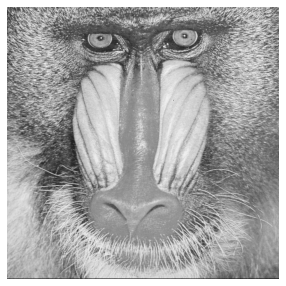

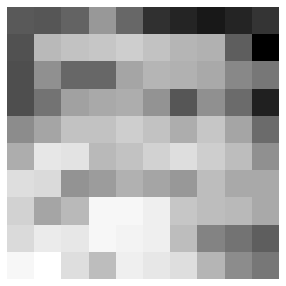

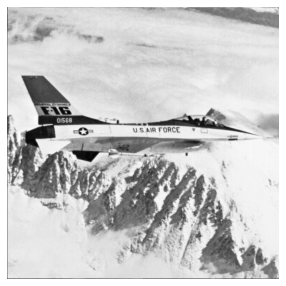

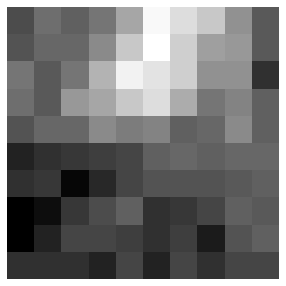

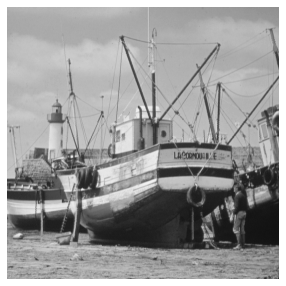

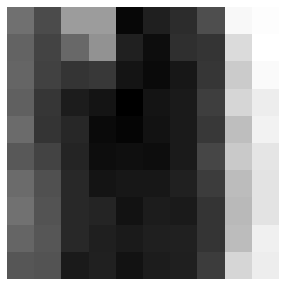

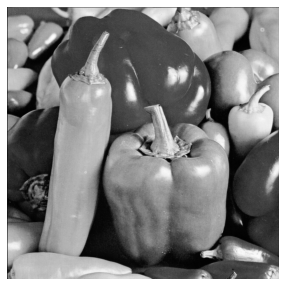

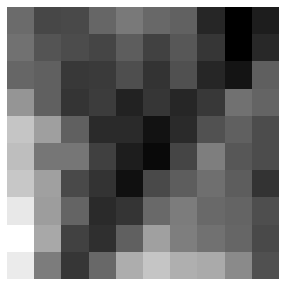

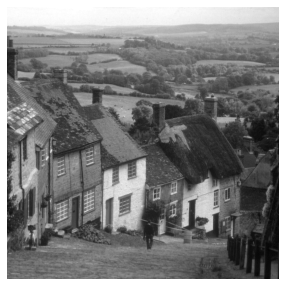

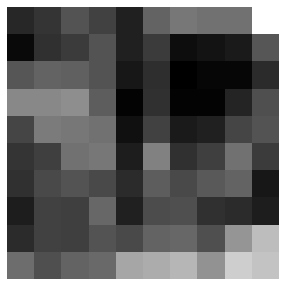

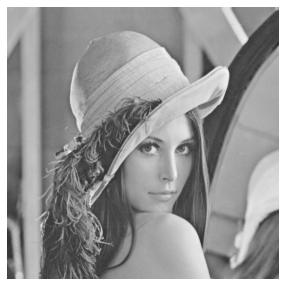

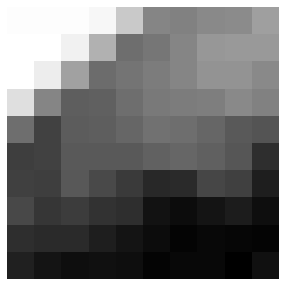

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

jjcv = jjcv_read_and_draw(cmap="gray")
BASE_DIR = "../Data/Hw1/data/"
FILENAME_LIST = ["baboon.bmp", "F16.bmp", "boat.bmp", "peppers.raw", "goldhill.raw", "lena.raw"]

for fname in FILENAME_LIST:
    fname = f"{BASE_DIR}{fname}"
    mode = fname[-3:]
    jjcv.read_and_draw(fname, mode)

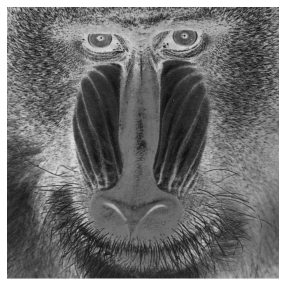

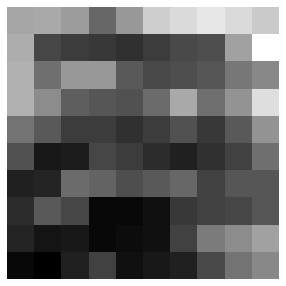

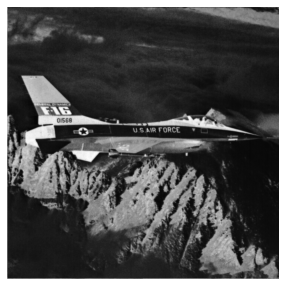

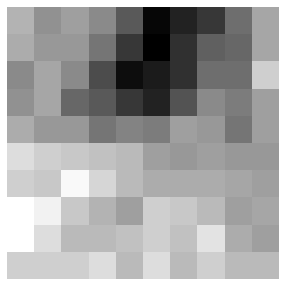

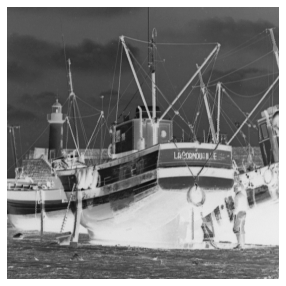

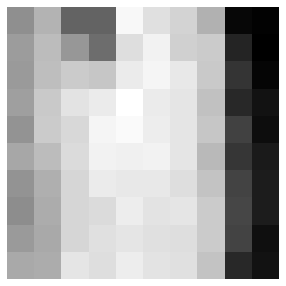

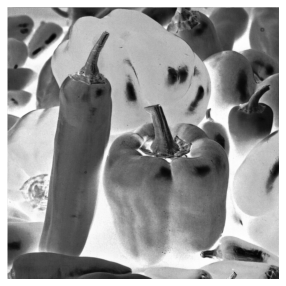

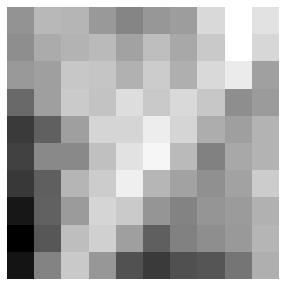

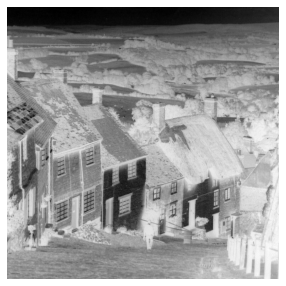

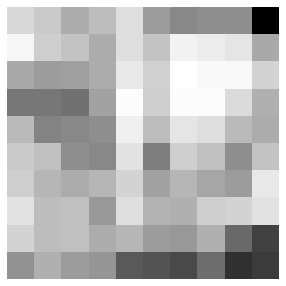

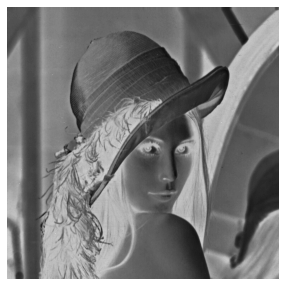

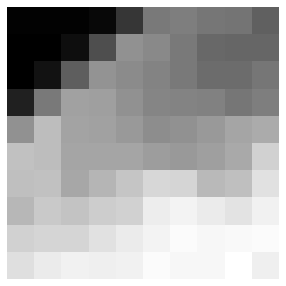

In [12]:
class jjcv_enhancement(jjcv_read_and_draw):

    def __init__(self, cmap):
        super().__init__(cmap)

    def image_negative(self, img):
        w, h = img.shape
        for x in range(w):
            for y in range(h):
                img[x, y] = 255 - img[x, y]
        self.common_draw(img, True)
        self.common_draw(self.private_get_center_area(img, 512, 10), True)
        return img

    def log_transform(self, img):
        """ 
        s=c*log(r+1)
        s = output pixel
        r = input pixel
        c = 255/(log(1 + max_input_pixel_value))
        """
        c = 255/(np.log(1 + 255))
        w, h = img.shape
        for x in range(w):
            for y in range(h):
                img[x, y] = c * np.log(img[x, y] + 1)
        self.common_draw(img, True)
        self.common_draw(self.private_get_center_area(img, 512,10), True)
        return img   

    def gamma_transform(self, img, gamma):
        """
        s=c*r^γ
        s = output pixel
        r = input pixel
        c = 255*(img/255)
        gamma = 0.4 ~ 255
        """
        w, h = img.shape
        for x in range(w):
            for y in range(h):
                img[x, y] = 255 * (img[x, y]/255) ** gamma
        self.common_draw(img, True)
        self.common_draw(self.private_get_center_area(img, 512,10), True)
        return img   
    
jjcv_enhance = jjcv_enhancement(cmap="gray")

for fname in FILENAME_LIST:
    fname = f"{BASE_DIR}{fname}"
    mode = fname[-3:]
    img = jjcv.common_read(fname, mode)
    img_enhance = jjcv_enhance.image_negative(img)

In [ ]:
img_baboon_bmp, img_baboon_center = read_and_plot_bmp(f"{BASE_DIR}/baboon.bmp")
img_F16_bmp, img_F16_center = read_and_plot_bmp(f"{BASE_DIR}/F16.bmp")
img_boat_bmp, img_boat_center = read_and_plot_bmp(f"{BASE_DIR}/boat.bmp")
img_peppers_raw, img_peppers_center = read_and_plot_raw(f"{BASE_DIR}/peppers.raw")
img_goldhill_raw, img_goldhill_center = read_and_plot_raw(f"{BASE_DIR}/goldhill.raw")
img_lena_raw, img_lena_center = read_and_plot_raw(f"{BASE_DIR}/lena.raw")

img_baboon_log_trans = ie.log_transform(img_baboon_bmp)
img_F16_log_trans = ie.log_transform(img_F16_bmp)
img_boat_log_trans = ie.log_transform(img_boat_bmp)
img_peppers_log_trans = ie.log_transform(img_peppers_raw)
img_goldhill_log_trans = ie.log_transform(img_goldhill_raw)
img_lean_log_trans = ie.log_transform(img_lena_raw)

In [ ]:
img_baboon_bmp, img_baboon_center = read_and_plot_bmp(f"{BASE_DIR}/baboon.bmp")
img_F16_bmp, img_F16_center = read_and_plot_bmp(f"{BASE_DIR}/F16.bmp")
img_boat_bmp, img_boat_center = read_and_plot_bmp(f"{BASE_DIR}/boat.bmp")
img_peppers_raw, img_peppers_center = read_and_plot_raw(f"{BASE_DIR}/peppers.raw")
img_goldhill_raw, img_goldhill_center = read_and_plot_raw(f"{BASE_DIR}/goldhill.raw")
img_lena_raw, img_lena_center = read_and_plot_raw(f"{BASE_DIR}/lena.raw")

gamma = 5
img_baboon_log_trans = ie.gamma_transform(img_baboon_bmp, gamma)
img_F16_log_trans = ie.gamma_transform(img_F16_bmp, gamma)
img_boat_log_trans = ie.gamma_transform(img_boat_bmp, gamma)
img_peppers_log_trans = ie.gamma_transform(img_peppers_raw, gamma)
img_goldhill_log_trans = ie.gamma_transform(img_goldhill_raw, gamma)
img_lean_log_trans = ie.gamma_transform(img_lena_raw, gamma)

In [ ]:
img_baboon_bmp, img_baboon_center = read_and_plot_bmp(f"{BASE_DIR}/baboon.bmp")
img_F16_bmp, img_F16_center = read_and_plot_bmp(f"{BASE_DIR}/F16.bmp")
img_boat_bmp, img_boat_center = read_and_plot_bmp(f"{BASE_DIR}/boat.bmp")
img_peppers_raw, img_peppers_center = read_and_plot_raw(f"{BASE_DIR}/peppers.raw")
img_goldhill_raw, img_goldhill_center = read_and_plot_raw(f"{BASE_DIR}/goldhill.raw")
img_lena_raw, img_lena_center = read_and_plot_raw(f"{BASE_DIR}/lena.raw")

In [ ]:
import math

def imgae_down_and_up_sampling(img_ori, target, mode):
  target_h, target_w = target
  ori_h, ori_w = img_ori.shape

  h_scale = float(target_h)/(ori_h)
  w_scale = float(target_w)/(ori_w)
  x_ratio = float(ori_w-1) / (target_w-1) if target_w > 1 else 0
  y_ratio = float(ori_h-1) / (target_h-1) if target_h > 1 else 0
  
  img_resize = np.empty((target_h, target_w), np.uint8)

  if mode == "nearest_neighbor":
    for y in range(target_h):
      for x in range(target_w):
        img_resize[y,x] = img_ori[int(y/h_scale), int(x/w_scale)]
    
    print(f"After Nearest Neighbor Interpolation:{target}")
    common_plot(img_resize, True)
  
  elif mode == "bilinear":
    for y in range(target_h):
      for x in range(target_w):

        x_l, y_l = math.floor(x_ratio * x), math.floor(y_ratio * y)
        x_h, y_h = math.ceil(x_ratio * x), math.ceil(y_ratio * y)

        x_weight = (x_ratio * x) - x_l
        y_weight = (y_ratio * y) - y_l

        a = img_ori[y_l, x_l]
        b = img_ori[y_l, x_h]
        c = img_ori[y_h, x_l]
        d = img_ori[y_h, x_h]

        pixel = a * (1 - x_weight) * (1 - y_weight) 
        pixel = pixel + b * x_weight * (1 - y_weight)
        pixel = pixel + c * y_weight * (1 - x_weight)
        pixel = pixel + d * x_weight * y_weight

        img_resize[y][x] = pixel

    print(f"After Bilinear Interpolation:{img_resize.shape}")
    common_plot(img_resize, True)

  return img_resize

img_baboon_bmp, img_baboon_center = read_and_plot_bmp(f"{BASE_DIR}/baboon.bmp")
img_F16_bmp, img_F16_center = read_and_plot_bmp(f"{BASE_DIR}/F16.bmp")
img_boat_bmp, img_boat_center = read_and_plot_bmp(f"{BASE_DIR}/boat.bmp")
img_peppers_raw, img_peppers_center = read_and_plot_raw(f"{BASE_DIR}/peppers.raw")
img_goldhill_raw, img_goldhill_center = read_and_plot_raw(f"{BASE_DIR}/goldhill.raw")
img_lena_raw, img_lena_center = read_and_plot_raw(f"{BASE_DIR}/lena.raw")

#for img_name in ["baboon", "F16", "boat"]:
for img_name in ["baboon"]:

  # img_bmp, img_baboon_center = read_and_plot_bmp(f"{BASE_DIR}/{img_name}.bmp")
  # img_bmp_nn_512x512_128x128 = imgae_down_and_up_sampling(img_bmp, (128, 128), "nearest_neighbor")
  # img_bmp_nn_512x512_32x32 = imgae_down_and_up_sampling(img_bmp, (32, 32), "nearest_neighbor")
  # img_bmp_nn_32x32_512x512 = imgae_down_and_up_sampling(img_bmp_nn_512x512_32x32, (512, 512), "nearest_neighbor")
  # img_bmp_nn_512x512_1024x1024 = imgae_down_and_up_sampling(img_bmp, (1024, 1024), "nearest_neighbor")
  # img_bmp_nn_128x128_256x512 = imgae_down_and_up_sampling(img_bmp_nn_512x512_128x128, (256, 512), "nearest_neighbor")

  img_bmp_bilinear_512x512_128x128 = imgae_down_and_up_sampling(img_bmp, (128, 128), "bilinear")
  img_bmp_bilinear_512x512_32x32 = imgae_down_and_up_sampling(img_bmp, (32, 32), "bilinear")
  img_bmp_bilinear_32x32_512x512 = imgae_down_and_up_sampling(img_bmp_bilinear_512x512_32x32, (512, 512), "bilinear")
  img_bmp_bilinear_512x512_1024x1024 = imgae_down_and_up_sampling(img_bmp, (1024, 1024), "bilinear")
  img_bmp_bilinear_128x128_256x512 = imgae_down_and_up_sampling(img_bmp_bilinear_512x512_128x128, (256, 512), "bilinear")

# for img_name in ["peppers", "goldhill", "lena"]:
#   img_raw, img_baboon_center = read_and_plot_raw(f"{BASE_DIR}/{img_name}.raw")
#   img_raw_nn_512x512_128x128 = imgae_down_and_up_sampling(img_raw, (128, 128), "nearest_neighbor")
#   img_raw_nn_512x512_32x32 = imgae_down_and_up_sampling(img_raw, (32, 32), "nearest_neighbor")
#   img_raw_nn_32x32_512x512 = imgae_down_and_up_sampling(img_raw_nn_512x512_32x32, (512, 512), "nearest_neighbor")
#   img_raw_nn_512x512_1024x1024 = imgae_down_and_up_sampling(img_raw, (1024, 1024), "nearest_neighbor")
#   img_raw_nn_128x128_256x512 = imgae_down_and_up_sampling(img_raw_nn_512x512_128x128, (256, 512), "nearest_neighbor")

  # img_raw_bilinear_512x512_128x128 = imgae_down_and_up_sampling(img_raw, (128, 128), "bilinear")
  # img_raw_bilinear_512x512_32x32 = imgae_down_and_up_sampling(img_raw, (32, 32), "bilinear")
  # img_raw_bilinear_32x32_512x512 = imgae_down_and_up_sampling(img_raw_bilinear_512x512_32x32, (512, 512), "bilinear")
  # img_raw_bilinear_512x512_1024x1024 = imgae_down_and_up_sampling(img_raw, (1024, 1024), "bilinear")
  # img_raw_bilinear_128x128_256x512 = imgae_down_and_up_sampling(img_raw_bilinear_512x512_128x128, (256, 512), "bilinear")



In [ ]:
import math

def bilinear_resize(image, height, width):
  """
  `image` is a 2-D numpy array
  `height` and `width` are the desired spatial dimension of the new 2-D array.
  """
  img_height, img_width = image.shape[:2]

  resized = np.empty([height, width])

  x_ratio = float(img_width - 1) / (width) if width > 1 else 0
  y_ratio = float(img_height - 1) / (height) if height > 1 else 0

  for i in range(height):
    for j in range(width):

      x_l, y_l = math.floor(x_ratio * j), math.floor(y_ratio * i)
      x_h, y_h = math.ceil(x_ratio * j), math.ceil(y_ratio * i)

      x_weight = (x_ratio * j) - x_l
      y_weight = (y_ratio * i) - y_l

      a = image[y_l, x_l]
      b = image[y_l, x_h]
      c = image[y_h, x_l]
      d = image[y_h, x_h]

      pixel = a * (1 - x_weight) * (1 - y_weight) + b * x_weight * (1 - y_weight) + c * y_weight * (1 - x_weight) + d * x_weight * y_weight

      resized[i][j] = pixel

  return resized
img_baboon_bmp, img_baboon_center = read_and_plot_bmp(f"{BASE_DIR}/baboon.bmp")
img_baboon_bmp_nn_512x512_128x128 = bilinear_resize(img_baboon_bmp, 32, 32)
img_baboon_bmp_nn_128x128_256x256 = bilinear_resize(img_baboon_bmp_nn_512x512_128x128, 256, 512)

common_plot(img_baboon_bmp_nn_512x512_128x128, False)